# Tutorial 1: Basics of CrypTen Tensors

We now have a high-level understanding of how secure MPC works. Through these tutorials, we will explain how to use CrypTen to carry out secure operations on encrypted tensors. In this tutorial, we will introduce a fundamental building block in CrypTen, called a ```CrypTensor```.  ```CrypTensors``` are encrypted ```torch``` tensors that can be used for computing securely on data. 

CrypTen currently only supports secure MPC protocols (though we intend to add support for other advanced encryption protocols). Using the ```mpc``` backend, ```CrypTensors``` act as ```torch``` tensors whose values are encrypted using secure MPC protocols. Tensors created using the ```mpc``` backend are called ```MPCTensors```. We will go into greater detail about ```MPCTensors``` in Tutorial 2. 

Let's begin by importing ```crypten``` and ```torch``` libraries. (If the imports fail, please see the installation instructions in the README.)

In [1]:
import crypten
import torch
from crypten.config import cfg
import timeit
import crypten.communicator as comm
from crypten.config import cfg
import logging
import matplotlib.pyplot as plt

crypten.init()
logging.getLogger().setLevel(logging.INFO)

# comm.get().set_verbosity(True)
# ... do stuff ..
# comm.get().print_communication_stats()

/Users/memo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_diff(x, z_enc):
    diff = (x - z_enc.get_plain_text()).abs()
    print("  Diff:", diff.mean(), diff.max())
    # print(diff[:print_terms])
    plt.plot(diff)
num_iters = 1
print_terms = 18

torch.Size([20])
Exponential:
  Exact : tensor([1.5230e-08, 3.7460e-08, 9.2136e-08, 2.2662e-07, 5.5739e-07, 1.3710e-06,
        3.3720e-06, 8.2938e-06, 2.0399e-05, 5.0175e-05, 1.2341e-04, 3.0354e-04,
        7.4659e-04, 1.8363e-03, 4.5166e-03, 1.1109e-02, 2.7324e-02, 6.7206e-02])
  Approx: 1 iterations in 0.004606250000506407 sec.: tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5259e-05, 3.0518e-05, 9.1553e-05, 2.5940e-04,
        6.5613e-04, 1.6937e-03, 4.2572e-03, 1.0651e-02, 2.6611e-02, 6.6162e-02])
  Diff: tensor(0.0002) tensor(0.0010)
  Nexp   : 1 iterations in 0.0065942909986915765 sec.: tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0518e-05, 9.1553e-05, 2.7466e-04,
        6.8665e-04, 1.7090e-03, 4.2267e-03, 1.0376e-02, 2.5620e-02, 6.2912e-02])
  Diff: tensor(0.0022) tensor(0.0255)
  Haar   : 1 iterations in 0.0052320830000098795 sec.

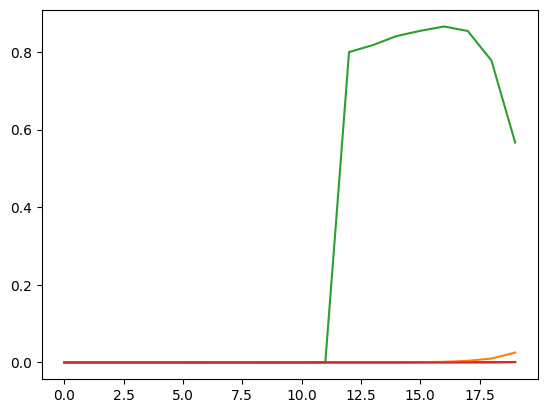

In [3]:
#Construct example input CrypTensor
x = torch.arange(-18, 0, 0.9)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'split', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Nexp   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)

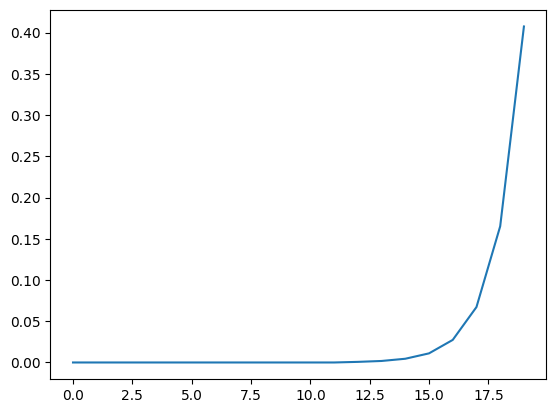

In [4]:
plt.plot(z_enc.get_plain_text())

torch.Size([54])
Exponential:
  Exact : tensor([0.0003, 0.0005, 0.0006, 0.0008, 0.0011, 0.0015, 0.0020, 0.0027, 0.0037,
        0.0050, 0.0067, 0.0091, 0.0123, 0.0166, 0.0224, 0.0302, 0.0408, 0.0550])
  Approx: 1 iterations in 0.003202457999577746 sec.: tensor([0.0003, 0.0004, 0.0005, 0.0007, 0.0010, 0.0014, 0.0019, 0.0025, 0.0035,
        0.0047, 0.0064, 0.0087, 0.0118, 0.0160, 0.0217, 0.0295, 0.0399, 0.0541])
  Diff: tensor(18.3263) tensor(310.0916)
  Haar  : 1 iterations in 0.008116916000290075 sec.: tensor([3.3569e-04, 6.1035e-04, 1.1139e-03, 2.0599e-03, 3.7384e-03, 6.7902e-03,
        1.2482e-02, 2.2614e-02, 4.1595e-02, 7.5317e-02, 1.3638e-01, 2.5087e-01,
        4.5427e-01, 8.3553e-01, 1.5130e+00, 2.7827e+00, 5.0389e+00, 9.1243e+00])
  Diff: tensor(175.4474) tensor(2032.0232)
  Bior  : 1 iterations in 0.0014872080009808997 sec.: tensor([4.5776e-04, 5.9509e-04, 1.2665e-03, 2.5330e-03, 4.9133e-03, 9.3231e-03,
        1.2192e-02, 2.5513e-02, 5.1025e-02, 9.8862e-02, 1.8730e-01, 2.449

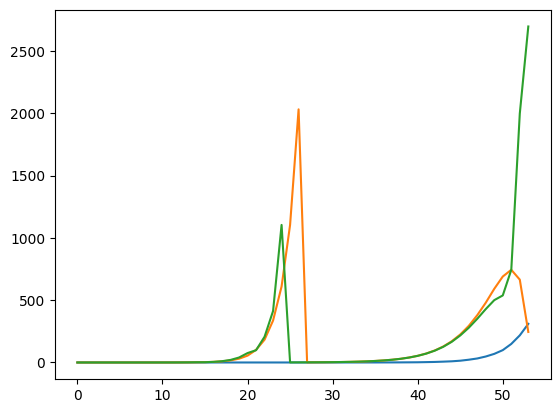

In [5]:
#Construct example input CrypTensor
x = torch.arange(-8, 8, 0.3)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)


Reciprocal:
  Exact : tensor([10.0000,  5.0000,  3.3333,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7692,  0.7143,  0.6667,  0.6250,
         0.5882,  0.5556])
  Approx: 1 iterations in 0.018993250001585693 sec.: tensor([10.0009,  5.0001,  3.3335,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7693,  0.7143,  0.6667,  0.6250,
         0.5883,  0.5556])
  Diff: tensor(5.4541e-05) tensor(0.0009)
  Haar  : 1 iterations in 0.026041708999400726 sec.: tensor([10.0397,  4.9708,  3.3464,  2.4975,  1.9922,  1.6677,  1.4262,  1.2518,
         1.1106,  0.9980,  0.9094,  0.8325,  0.7699,  0.7141,  0.6658,  0.6251,
         0.5878,  0.5559])
  Diff: tensor(0.0011) tensor(0.0397)
  Bior  : 1 iterations in 0.004409875000419561 sec.: tensor([ 1.6116e+04,  2.1469e+03, -3.8698e+03, -1.9340e+03,  1.8936e+00,
         1.6582e+00,  1.4229e+00,  1.2419e+00,  1.1153e+00,  9.8874e-01,
         9.1100e-01,  8.3325e-0

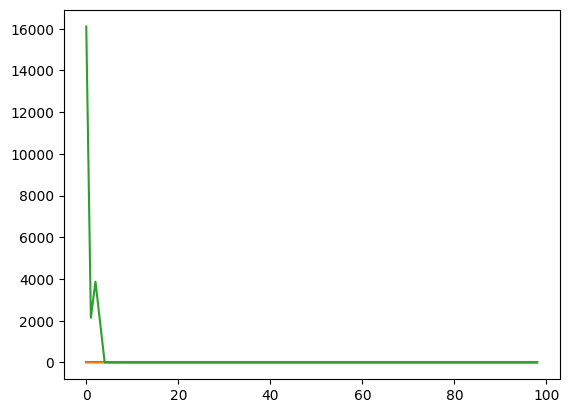

In [6]:
# x = torch.tensor([0.00005, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]) # , 5, 10, 50, 100 , 500, 1000, 5000, 10000, 50000])
x = torch.arange(0.1, 10, 0.1)
x_enc = crypten.cryptensor(x)

print("\nReciprocal:")
print("  Exact :", x.reciprocal()[:print_terms])
with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
# with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit', "functions.reciprocal_initial": 1}):
#     start1 = timeit.default_timer()
#     for _ in range(num_iters):
#         z_enc = x_enc.reciprocal()  # Private
#     print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
#     print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)


Logarithm (LUT faster):
  Exact : tensor([-4.6052, -3.9120, -3.5066, -3.2189, -2.9957, -2.8134, -2.6593, -2.5257,
        -2.4079, -2.3026, -2.2073, -2.1203, -2.0402, -1.9661, -1.8971, -1.8326,
        -1.7720, -1.7148])
  Approx: 1 iterations in 0.0187283749692142 sec.: tensor([-9.5972, -9.4460, -9.3022, -9.1605, -9.0254, -8.8896, -8.7595, -8.6318,
        -8.5008, -8.3755, -8.2466, -8.1220, -8.0077, -7.9075, -7.8109, -7.7110,
        -7.6146, -7.5151])
  Diff: tensor(0.3914) tensor(6.1061)
  Haar  : 1 iterations in 0.01647249993402511 sec.: tensor([-5.1546, -3.7722, -3.7722, -3.2491, -2.9094, -2.9094, -2.6568, -2.4554,
        -2.4554, -2.2880, -2.1447, -2.1447, -2.0193, -2.0193, -1.9080, -1.8078,
        -1.8078, -1.7168])
  Diff: tensor(0.0038) tensor(0.5494)
  Bior  : 1 iterations in 0.019552667043171823 sec.: tensor([-5.4848, -3.5015, -3.4472, -3.2216, -2.9930, -2.8118, -2.6605, -2.5239,
        -2.4078, -2.3030, -2.2056, -2.1204, -2.0402, -1.9650, -1.8972, -1.8324,
        -1.7

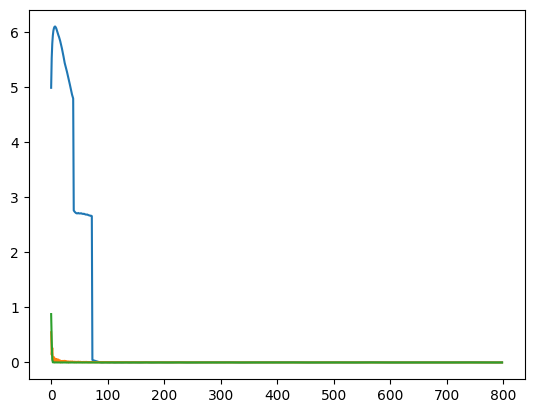

In [7]:
x = torch.arange(0.01, 8, 0.01)
x_enc = crypten.cryptensor(x)

print("\nLogarithm (LUT faster):")
print("  Exact :", x.log()[:print_terms])
with cfg.temp_override({"functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)

torch.Size([790])

Square Root: (LUT faster)
  Exact : tensor([0.3162, 0.3317, 0.3464, 0.3606, 0.3742, 0.3873, 0.4000, 0.4123, 0.4243,
        0.4359, 0.4472, 0.4583, 0.4690, 0.4796, 0.4899, 0.5000, 0.5099, 0.5196])
  Approx: 1 iterations in 0.008805584046058357 sec.: tensor([0.3146, 0.3306, 0.3457, 0.3601, 0.3739, 0.3871, 0.3999, 0.4122, 0.4242,
        0.4359, 0.4472, 0.4582, 0.4690, 0.4796, 0.4899, 0.5000, 0.5099, 0.5196])
  Diff: tensor(0.0015) tensor(0.0076)
  Haar   : 1 iterations in 0.016935624997131526 sec.: tensor([0.3186, 0.3423, 0.3423, 0.3644, 0.3644, 0.3852, 0.4050, 0.4050, 0.4239,
        0.4419, 0.4419, 0.4593, 0.4760, 0.4760, 0.4921, 0.5077, 0.5077, 0.5229])
  Diff: tensor(0.0012) tensor(0.0106)
  Bior   : 1 iterations in 0.0027453749207779765 sec.: tensor([0.2478, 0.2667, 0.2855, 0.3044, 0.3232, 0.3420, 0.3609, 0.3797, 0.3986,
        0.4174, 0.4363, 0.4551, 0.4739, 0.4928, 0.5116, 0.5305, 0.5377, 0.5449])
  Diff: tensor(0.0012) tensor(0.0684)


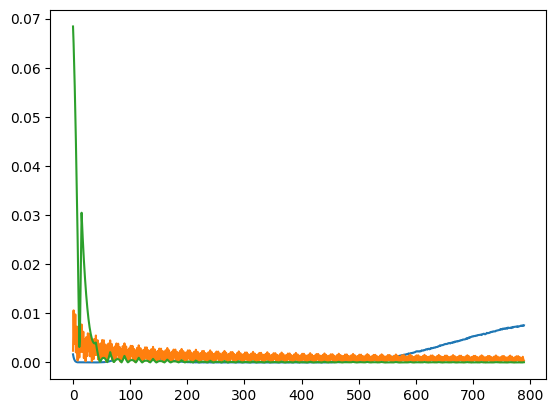

In [8]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSquare Root: (LUT faster)")
print("  Exact :", x.sqrt()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)

torch.Size([790])

Inverse Square Root: (LUT faster)
  Exact : tensor([3.1623, 3.0151, 2.8868, 2.7735, 2.6726, 2.5820, 2.5000, 2.4254, 2.3570,
        2.2942, 2.2361, 2.1822, 2.1320, 2.0851, 2.0412, 2.0000, 1.9612, 1.9245])
  Approx: 1 iterations in 0.010669915936887264 sec.: tensor([3.1461, 3.0058, 2.8813, 2.7705, 2.6709, 2.5811, 2.4996, 2.4251, 2.3569,
        2.2942, 2.2361, 2.1822, 2.1321, 2.0852, 2.0413, 2.0000, 1.9612, 1.9245])
  Diff: tensor(0.0004) tensor(0.0162)
  Haar   : 1 iterations in 0.016230709035880864 sec.: tensor([3.1401, 2.9227, 2.9227, 2.7451, 2.7451, 2.5964, 2.4695, 2.4695, 2.3596,
        2.2631, 2.2631, 2.1777, 2.1012, 2.1012, 2.0322, 1.9697, 1.9697, 1.9125])
  Diff: tensor(0.0014) tensor(0.0924)
  Bior   : 1 iterations in 0.01965045800898224 sec.: tensor([0.3162, 0.3318, 0.3464, 0.3606, 0.3743, 0.3873, 0.4000, 0.4124, 0.4243,
        0.4359, 0.4473, 0.4583, 0.4691, 0.4796, 0.4899, 0.5001, 0.5099, 0.5196])
  Diff: tensor(1.4538) tensor(2.8461)


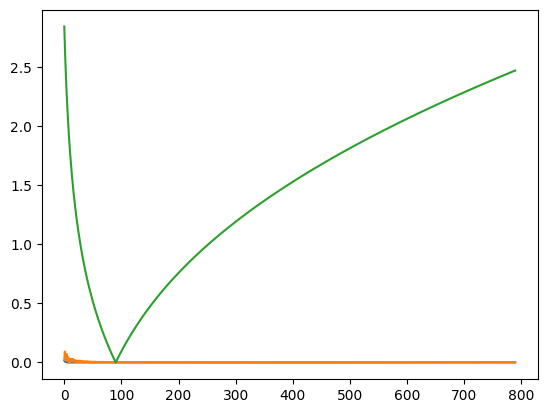

In [9]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nInverse Square Root: (LUT faster)")
print("  Exact :", x.sqrt().reciprocal()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)

In [13]:
x = torch.arange(-10, 10, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSin:")
print("  Exact :", x.sin()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sin()-z_enc.get_plain_text()).abs().mean(), (x.sin()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sin()-z_enc.get_plain_text()).abs().mean(), (x.sin()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sin()-z_enc.get_plain_text()).abs().mean(), (x.sin()-z_enc.get_plain_text()).abs().max())


print("\nCos:")
print("  Exact :", x.cos()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.cos()-z_enc.get_plain_text()).abs().mean(), (x.cos()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.cos()-z_enc.get_plain_text()).abs().mean(), (x.cos()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.cos()-z_enc.get_plain_text()).abs().mean(), (x.cos()-z_enc.get_plain_text()).abs().max())

torch.Size([2000])

Sin:
  Exact : tensor([0.5440, 0.5356, 0.5271, 0.5186, 0.5100, 0.5014, 0.4927, 0.4840, 0.4752,
        0.4664, 0.4575, 0.4486, 0.4397, 0.4307, 0.4216, 0.4125, 0.4034, 0.3942])
  Approx: 1 iterations in 0.016521750018000603 sec.: tensor([0.5629, 0.5498, 0.5348, 0.5348, 0.5211, 0.5058, 0.5058, 0.4916, 0.4759,
        0.4759, 0.4603, 0.4456, 0.4456, 0.4318, 0.4318, 0.4173, 0.4012, 0.4012])
  Diff: tensor(0.0174) tensor(0.0506)
  Haar  : 1 iterations in 0.014236999908462167 sec.: tensor([0.5325, 0.5325, 0.5325, 0.5058, 0.5058, 0.5058, 0.5058, 0.4786, 0.4786,
        0.4786, 0.4509, 0.4509, 0.4509, 0.4228, 0.4228, 0.4228, 0.3943, 0.3943])
  Diff: tensor(0.0051) tensor(0.0156)
  Bior  : 1 iterations in 0.005023250007070601 sec.: tensor([0.5451, 0.5362, 0.5273, 0.5185, 0.5096, 0.5007, 0.4918, 0.4830, 0.4741,
        0.4652, 0.4563, 0.4475, 0.4386, 0.4297, 0.4208, 0.4119, 0.4031, 0.3942])
  Diff: tensor(0.0013) tensor(0.0052)

Cos:
  Exact : tensor([-0.8391, -0.8445, -0.849

In [14]:
print("\nSigmoid:")
print("  Exact :", x.sigmoid()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sigmoid()-z_enc.get_plain_text()).abs().mean(), (x.sigmoid()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sigmoid()-z_enc.get_plain_text()).abs().mean(), (x.sigmoid()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.sigmoid()-z_enc.get_plain_text()).abs().mean(), (x.sigmoid()-z_enc.get_plain_text()).abs().max())


print("Tanh:")
print("  Exact :", x.tanh()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", ((x.tanh()-z_enc.get_plain_text())/(x.tanh()+2.2e-16)).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", ((x.tanh()-z_enc.get_plain_text())/(x.tanh()+2.2e-16)).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", ((x.tanh()-z_enc.get_plain_text())/(x.tanh()+2.2e-16)).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().mean(), (x.tanh()-z_enc.get_plain_text()).abs().max())


Sigmoid:
  Exact : tensor([4.5398e-05, 4.5854e-05, 4.6315e-05, 4.6780e-05, 4.7251e-05, 4.7725e-05,
        4.8205e-05, 4.8689e-05, 4.9179e-05, 4.9673e-05, 5.0172e-05, 5.0676e-05,
        5.1186e-05, 5.1700e-05, 5.2220e-05, 5.2744e-05, 5.3274e-05, 5.3810e-05])
  Approx: 1 iterations in 0.013302707928232849 sec.: tensor([1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05,
        1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05,
        1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05, 1.5259e-05])
  Diff: tensor(42.9514) tensor(5119.0908)
  Haar  : 1 iterations in 0.04209545790217817 sec.: tensor([4.5776e-05, 4.5776e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05,
        6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05,
        6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05, 6.1035e-05])
  Diff: tensor(0.0002) tensor(0.0020)
  Bior  : 1 iterations in 0.007521540974266827 sec.: tensor([4.5776e-05,

In [12]:
print("Erf:")
print("  Exact :", x.erf()[:print_terms])
with cfg.temp_override({"functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.erf()-z_enc.get_plain_text()).abs().mean(), (x.erf()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.erf_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.erf()-z_enc.get_plain_text()).abs().mean(), (x.erf()-z_enc.get_plain_text()).abs().max())
with cfg.temp_override({"functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print("  Diff:", (x.erf()-z_enc.get_plain_text()).abs().mean(), (x.erf()-z_enc.get_plain_text()).abs().max())



Erf:
  Exact : tensor([0.1125, 0.1236, 0.1348, 0.1459, 0.1569, 0.1680, 0.1790, 0.1900, 0.2009,
        0.2118, 0.2227, 0.2335, 0.2443, 0.2550, 0.2657, 0.2763, 0.2869, 0.2974])
  Approx: 1 iterations in 0.014060750021599233 sec.: tensor([0.1125, 0.1236, 0.1348, 0.1459, 0.1570, 0.1680, 0.1790, 0.1900, 0.2009,
        0.2118, 0.2227, 0.2335, 0.2442, 0.2549, 0.2656, 0.2762, 0.2868, 0.2973])
  Diff: tensor(2323246.5000) tensor(14850363.)
  Haar  : 1 iterations in 0.02378216607030481 sec.: tensor([0.1142, 0.1316, 0.1316, 0.1490, 0.1490, 0.1663, 0.1835, 0.1835, 0.2006,
        0.2176, 0.2176, 0.2345, 0.2513, 0.2513, 0.2680, 0.2846, 0.2846, 0.3010])
  Diff: tensor(0.0004) tensor(0.0083)
  Bior  : 1 iterations in 0.0053937919437885284 sec.: tensor([0.1119, 0.1230, 0.1342, 0.1453, 0.1565, 0.1676, 0.1787, 0.1899, 0.2010,
        0.2122, 0.2233, 0.2345, 0.2456, 0.2567, 0.2679, 0.2790, 0.2889, 0.2987])
  Diff: tensor(0.0003) tensor(0.0049)


#### Advanced mathematics
We are also able to compute more advanced mathematical functions on ```CrypTensors``` using iterative approximations. CrypTen provides MPC support for functions like reciprocal, exponential, logarithm, square root, tanh, etc. Notice that these are subject to numerical error due to the approximations used. 

Additionally, note that some of these functions will fail silently when input values are outside of the range of convergence for the approximations used. These do not produce errors because value are encrypted and cannot be checked without decryption. Exercise caution when using these functions. (It is good practice here to normalize input values for certain models.)